<a href="https://colab.research.google.com/github/martuscellifaria/MachineLearning/blob/main/14_Grouping_customers_using_hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Grouping customers using hierarchical clustering**
A company wants to know which types of shopping mall customers have higher spending potential, with higher accuracy. The company identifies the most decisive parameters as annual income and spending score. We'll use the hierarchical clustering model.
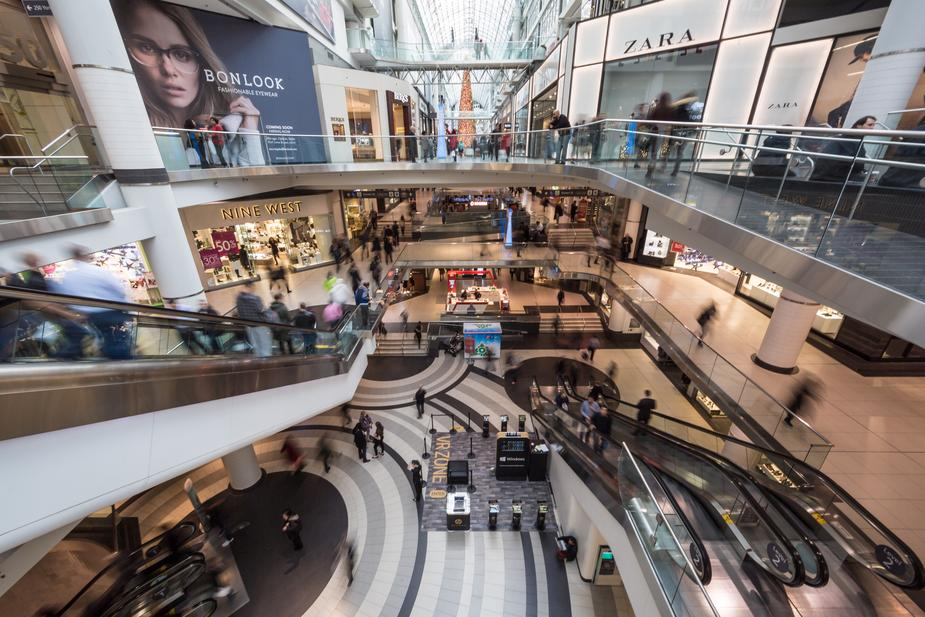


#**01. Importing libraries**
Once again, the needed libraries follow:

*   Numpy - Perform mathematical operations;
*   Pandas - Perform data manipulation and analysis;
*   Matplotlib - Library for plotting and visualizing data.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **02. Loading data from a .csv file**
Let us load the Mall_Customers.csv file and allocate their columns to vector X. We will use the *.head() to show the first five entries of the table.

In [2]:
dataset= pd.read_csv('/content/drive/My Drive/Colab Notebooks/Study Datasets/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **03. Using a dendogram to find the optimal number of clusters**
A dendogram is a tree diagram, where the clusters arrangement is produced by correspondence analysis. For this to work out, we'll be using the scipy library ***scipy.cluster.hierarchy***.

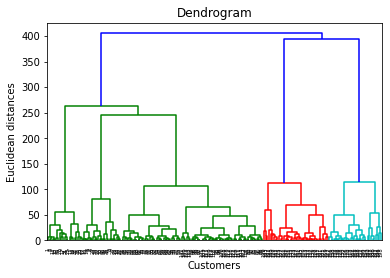

In [5]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

#**04. Applying hierarchical clustering model on the dataset**
For that, we'll call the ***sklearn.cluster*** library.

In [6]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

#**05. Visualizing the clusters**
We'll visualize the information retrieved and obtain a pattern of consumers.

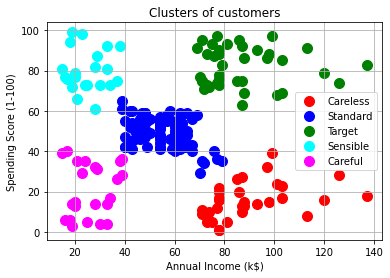

In [7]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Careless')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Sensible')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Careful')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(which='major')
plt.grid(which='minor')
plt.legend()
plt.show()

#**06. Conclusion**
The outcome obtained is an indicative that the hierarchical clustering is a great model for the studied case.